In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Summary

Toy Results for the action

$$ S = \int d^{d+1}x\, -\frac{1}{2}\partial_{\mu}\phi\partial^{\mu}\phi - \frac{1}{2}m^2\phi^2 - \frac{\lambda}{4!}\phi^,. $$

As a warmup, we'll look for zero temperature transitions which would arise from adjusting the parameters $m^2$ and $\lambda$. We'll do this via Hybrid Monte Carlo simulations, drawing samples from the distribution defined by the Euclidean action $$S_E = \int_0^{\beta}\int d^dx\, \frac{1}{2}\partial_{\mu}\phi \partial_{\mu}\phi + \frac{1}{2}m^2\phi^2 + \frac{\lambda}{4!}\phi^4\,,$$

with $\beta = \infty $.  We'll use the magnetization $M = \frac{1}{V}\int d^d x \,\phi(x)$ as the order parameter.

# Parameter Choices

For a single step of the Hybrid Monte Carlo Algorithm we make a draw of the auxiliary momentum $\Pi$ from a gaussian distribution with variance $\sigma$, that is $\Pi\sim N(0, \sigma^2)$. Then we compute our candidate field $\phi'$ with the leapfrog symplectic integration scheme

$$ \Pi' = \Pi - \frac{\epsilon}{2}\frac{\delta S_E(\phi)}{\delta \Pi}\newline
   \phi' = \phi + \epsilon \Pi'\newline
   \Pi'' = \Pi' - \frac{\epsilon}{2}\frac{\delta S_E(\phi')}{\delta \Pi}\,,$$

and apply metropolis step to decide whether to accept or reject the candidate $\phi'$.  To get good results, we must tune $\sigma$ and $\epsilon$ so the acceptance ratio is high, and the burn-in time is low.  A few choices are demonstrated below.  $\epsilon = 0.1$ and $\sigma = 0.5$ appear to be good values, though we can also pick some lower values for epsilon too.

In [43]:
epsilon_01_sigma_1 = pd.read_csv('../stored_data/burn_in/burn_in_epsilon_0.1_sigma_1.csv', delimiter=',', index_col=False)
epsilon_001_sigma_1 = pd.read_csv('../stored_data/burn_in/burn_in_epsilon_0.01_sigma_1.csv', delimiter=',', index_col=False)
epsilon_01_sigma_05 = pd.read_csv('../stored_data/burn_in/burn_in_epsilon_0.1_sigma_0.5.csv', delimiter=',', index_col=False)
epsilon_001_sigma_05 = pd.read_csv('../stored_data/burn_in/burn_in_epsilon_0.01_sigma_0.5.csv', delimiter=',', index_col=False)

Text(0.5, 1.0, 'epsilon = 0.01, sigma = 0.5')

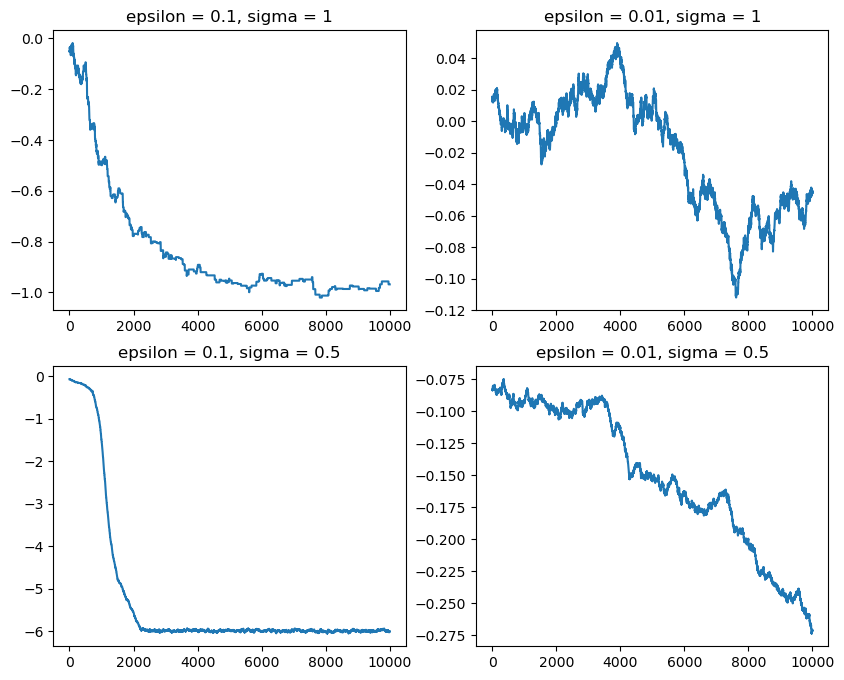

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0][0].plot(epsilon_01_sigma_1)
ax[0][0].set_title("epsilon = 0.1, sigma = 1")

ax[0][1].plot(epsilon_001_sigma_1)
ax[0][1].set_title("epsilon = 0.01, sigma = 1")

ax[1][0].plot(epsilon_01_sigma_05)
ax[1][0].set_title("epsilon = 0.1, sigma = 0.5")

ax[1][1].plot(epsilon_001_sigma_05)
ax[1][1].set_title("epsilon = 0.01, sigma = 0.5")

Grid $=\beta$ x10, $\beta = \infty = 10$, $m^2 = -3$, $\lambda = 0.5$

# Results

We will stick to relatively small lattices, with ~5 sites in each direction. For continuum fields, it is very difficult to find good HMC parameters when the lattice size is large, especially compared to discrete fields.  

This is intuitive, as the state space is very very large, much larger than for discrete fields. In fact, the whole point of HMC is to choose good candidate configurations based on the current configuration, so it isn't suprising this is difficult. Will have to look into different integrators, and NUTS to improve sampling.  Alternatively, we could make some better intial guesses

In [48]:
one_d = pd.read_csv('../stored_data/phases/5x5.csv', delimiter=',', index_col=False)
two_d = pd.read_csv('../stored_data/phases/5x5x5.csv', delimiter=',', index_col=False)

In [49]:
obs = "abs mag"
one_d_data = one_d[["m^2", "lambda", obs]].pivot(index="m^2", columns="lambda", values=obs)
two_d_data = two_d[["m^2", "lambda", obs]].pivot(index="m^2", columns="lambda", values=obs)

Text(0.5, 1.0, 'Vol = 5x5, beta = 5, epsilon = 0.1, sigma = 0.05')

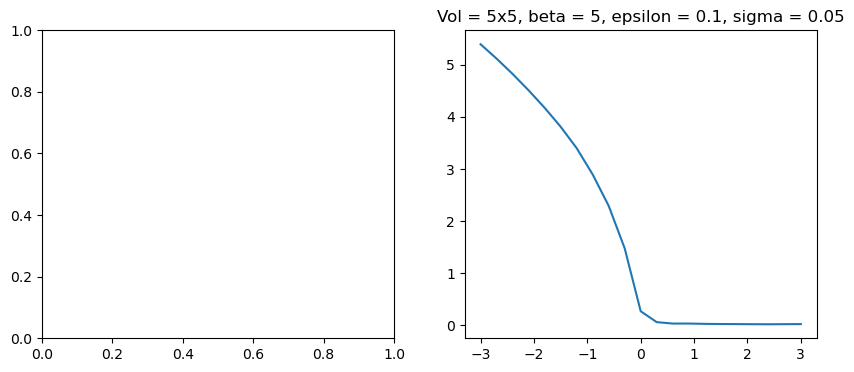

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(one_d_data)
ax[0].set_title("Vol = 5, beta = 5, epsilon = 0.05, sigma = 0.5")

ax[1].plot(two_d_data)
ax[1].set_title("Vol = 5x5, beta = 5, epsilon = 0.1, sigma = 0.05")


steps = $50,000$, $\lambda = 0.5$